In [16]:
import numpy as np
from numpy import log,dot,e,shape
import matplotlib.pyplot as plt
from scipy.special import expit
from math import ceil

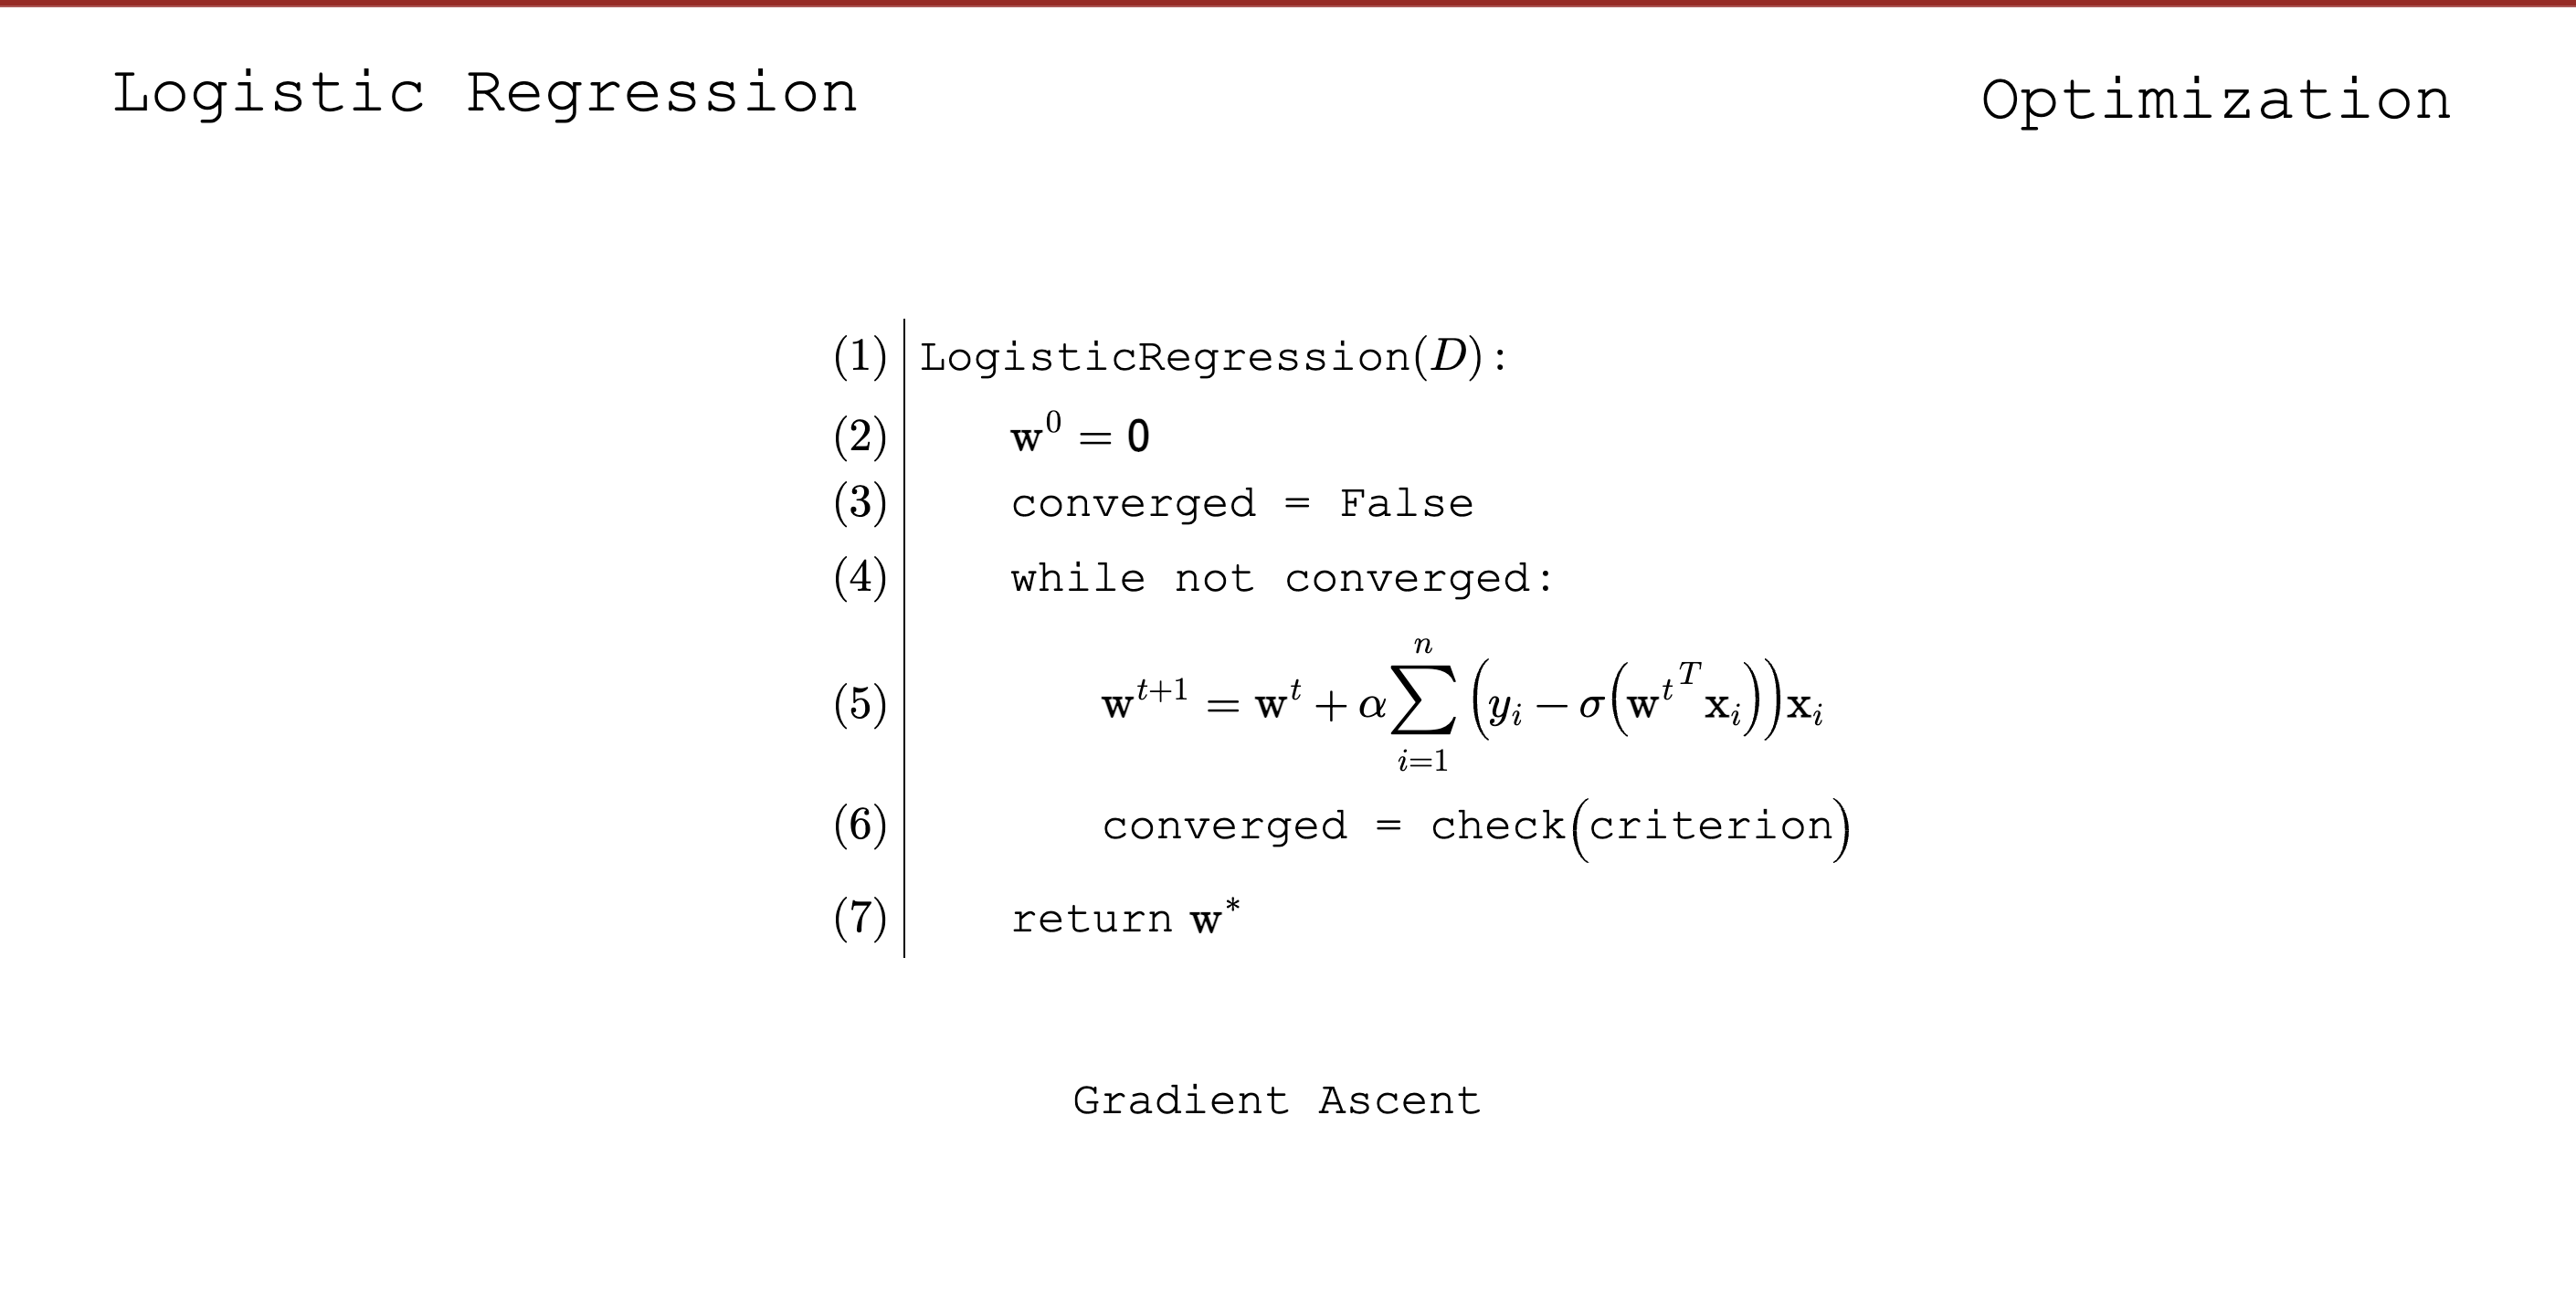
    
        
        
        
        

Credits for the above image: https://bsc-iitm.github.io/karthikt/

X -> (n x d) | w -> (d x 1)

## Logistic Regression using Gradient Descent    

In [82]:
class Logistic_Regression:
    def __init__(self,lr=0.001,n_epochs=1000):
        self.lr=lr
        self.n_epochs=n_epochs
        self.weights=None
        self.bias=None
        self.losses=[]
    #sigmoid fn
    def sigmoid(self,z):
        return 1/(1+np.exp(-z))
    #cross entropy loss
    def cost(self,y_true,y_pred):
        epsilon = 1e-9
      
        BCE= y_true*np.log(y_pred + epsilon) + (1-y_true)*np.log(1-y_pred+epsilon) #(n,1)
        n=y_true.shape[0]
    
    def calc_probab(self,X,y):
        z=(X@self.weights) + self.bias
        z = np.clip(z, -500, 500) #due to the overflow error
        y_pred=self.sigmoid(z)
        return y_pred
    #fit method with gradient descent
    def fit(self,X,y):
        n_samples,n_features=X.shape 

        # self.weights=np.zeros(n_features) 
        self.weights = np.zeros(n_features)
        self.bias=0
        count=0
        for epoch in range(self.n_epochs):
            count+=1
            y_pred=self.calc_probab(X,y)
            self.losses.append(self.cost(y,y_pred))
            residuals=y_pred-y
            db = (1 / n_samples) * np.sum(residuals)
            # gradient= (1/n_samples) * X.T@residuals  #(d x n)(nx1)=(d x 1)
            gradient = (1 / n_samples) * np.dot(X.T, residuals)
            self.weights -= self.lr * gradient
            self.bias -= self.lr * db


    #mini-batch gradient descent
    def fit_mb(self,X,y):
        np.random.seed(42)
        
        minibatch_size=20
       
        n_samples,n_features=X.shape
        self.weights=np.zeros(n_features)
        self.bias=0
        n_batches_per_epoch=ceil(n_samples/minibatch_size)
        
        t0,t1=200,1000

        def learning_schedule(t):
            return t0/(t+t1)

        for epoch in range(self.n_epochs):
            shuffled_indices=np.random.permutation(n_samples)
            X_shuffled=X[shuffled_indices]
            y_shuffled=y[shuffled_indices]

            for iter in range(0,n_batches_per_epoch):
                idx=iter*minibatch_size
                xi=X_shuffled[idx:idx+minibatch_size]
                yi=y_shuffled[idx:idx+minibatch_size]
                y_pred=self.calc_probab(X,y)
                residuals=y_pred-y
                gradient=2/minibatch_size * np.dot(X.T, residuals)
                eta=learning_schedule(iter)
                db = (1 / n_samples) * np.sum(residuals)
                self.weights -= self.lr * gradient
                self.bias -= self.lr * db

            
    #predictions
    def predict(self, X):
        threshold = .5
        y_hat = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(y_hat)
        y_predicted_cls = [1 if i > threshold else 0 for i in y_predicted]
        
        return np.array(y_predicted_cls)
        
        
    

In [83]:
#breast cancer dataset
from sklearn.model_selection import train_test_split
from sklearn import datasets

dataset = datasets.load_breast_cancer()
X, y = dataset.data, dataset.target

X, y = dataset.data, dataset.target 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234
)

## Gradient descent

In [84]:
log_reg=Logistic_Regression(lr=0.0001, n_epochs=1000)
log_reg.fit(X_train, y_train)

In [85]:
predictions_bgd = log_reg.predict(X_test)
predictions_bgd.shape


(114,)

In [86]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions) *100 

92.98245614035088

##### Roughly 93% accuracy!

### Mini batch gradient descent

In [87]:
log_reg_mb=Logistic_Regression(lr=0.0001, n_epochs=1000)
log_reg_mb.fit_mb(X_train,y_train)

In [88]:
predictions_mb = log_reg_mb.predict(X_test)
predictions_mb.shape

/var/folders/7j/6p_pd3gd44zfw3nn6n10_pnh0000gn/T/ipykernel_12985/344992698.py:10: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))


(114,)

In [89]:
predictions_mb.shape

(114,)

In [90]:
accuracy_score(y_test,predictions_mb) *100 

90.35087719298247

##### 90% accuracy with mini-batch gradient descent